In [1]:
!pip install be-great

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
from be_great import GReaT
import pandas as pd
data = pd.read_csv("diabetes_train.csv")
len(data)

80000

### Running the model

In [4]:
%%time
model = GReaT(llm='distilgpt2', batch_size=64, epochs=6, save_steps=400000)
model.fit(data)
synthetic_data = model.sample(n_samples=len(data))

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.596700
1000,0.491900
1500,0.484600
2000,0.480800
2500,0.478600
3000,0.477400
3500,0.475400
4000,0.475200
4500,0.473400
5000,0.473600


Step,Training Loss
500,0.596700
1000,0.491900
1500,0.484600
2000,0.480800
2500,0.478600
3000,0.477400
3500,0.475400
4000,0.475200
4500,0.473400
5000,0.473600


  0%|          | 0/80000 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
80092it [10:24, 128.20it/s]

CPU times: user 1h 38min 20s, sys: 15.3 s, total: 1h 38min 35s
Wall time: 1h 40min 10s


In [5]:
#Loading testing data
X_test = pd.read_csv("diabetes_test.csv")

In [6]:
synthetic_data.to_csv('diabetes_synthetic_GReaT_t2.csv',encoding='utf-8',index= False)

In [7]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,73.0,0,0,former,24.77,3.5,80,0
1,Male,80.0,0,0,never,24.60,5.7,145,1
2,Female,38.0,0,0,ever,24.33,4.0,158,0
3,Female,26.0,0,0,not current,18.87,5.0,100,0
4,Female,61.0,1,0,current,22.11,4.5,85,0


In [8]:
synthetic_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,23.0,0.0,0.0,never,27.32,3.5,85.0,0.0
1,Male,80.0,0.0,0.0,not current,27.32,5.7,130.0,1.0
2,Female,67.0,1.0,0.0,former,34.11,6.1,159.0,1.0
3,Female,32.0,0.0,0.0,never,21.92,5.0,126.0,0.0
4,Male,21.0,0.0,0.0,never,27.32,6.2,145.0,0.0


Assessing Duplicates

In [9]:
def assess_duplicates(real,fake):
# Find duplicates within the 'real' dataset
    duplicates_in_real = real[real.duplicated(keep=False)]  # keep=False marks all duplicates

    # Find duplicates within the 'synthetic' dataset
    duplicates_in_synthetic = fake[fake.duplicated(keep='first')]  # keep=False marks all duplicates

    # Print the number of duplicate rows in each DataFrame
    print("Number of duplicate rows in 'real' dataset:", len(duplicates_in_real))
    print("Number of duplicate rows in 'synthetic' dataset:", len(duplicates_in_synthetic))


    # Find common duplicates between the two datasets
    common_duplicates = pd.merge(real, fake, how='inner').drop_duplicates()

    # Print the number of common duplicate rows between 'real' and 'synthetic'
    print("Number of common duplicate rows between 'real' and 'synthetic':", len(common_duplicates))

In [10]:
assess_duplicates(data,synthetic_data)

Number of duplicate rows in 'real' dataset: 4682
Number of duplicate rows in 'synthetic' dataset: 13154
Number of common duplicate rows between 'real' and 'synthetic': 6248


## Using Table Evaluator for Data Evaluation

In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install table_evaluator
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Local links for analysis
#import pandas as pd
#data = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/diabetes/diabetes_train.csv")
#X_test = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/diabetes/diabetes_test.csv")
#synthetic_data = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/Synthetic Data/diabetes_synthetic_GReaT.csv")

(20000, 9) (80000, 9)


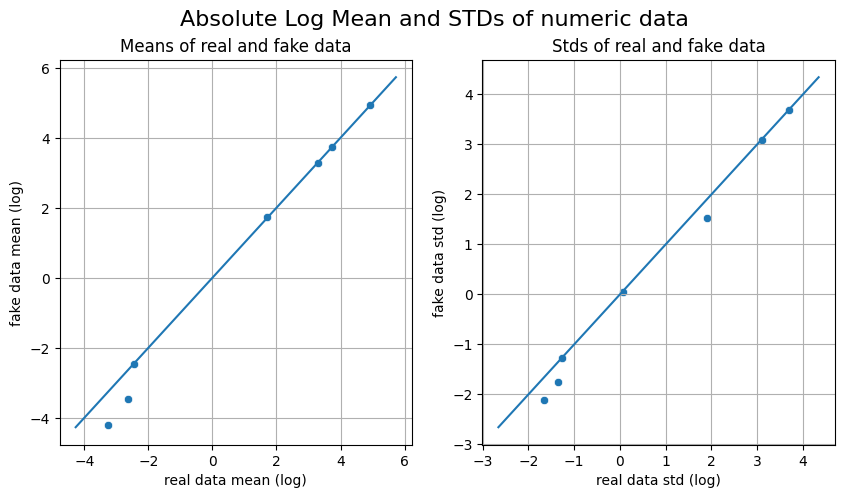

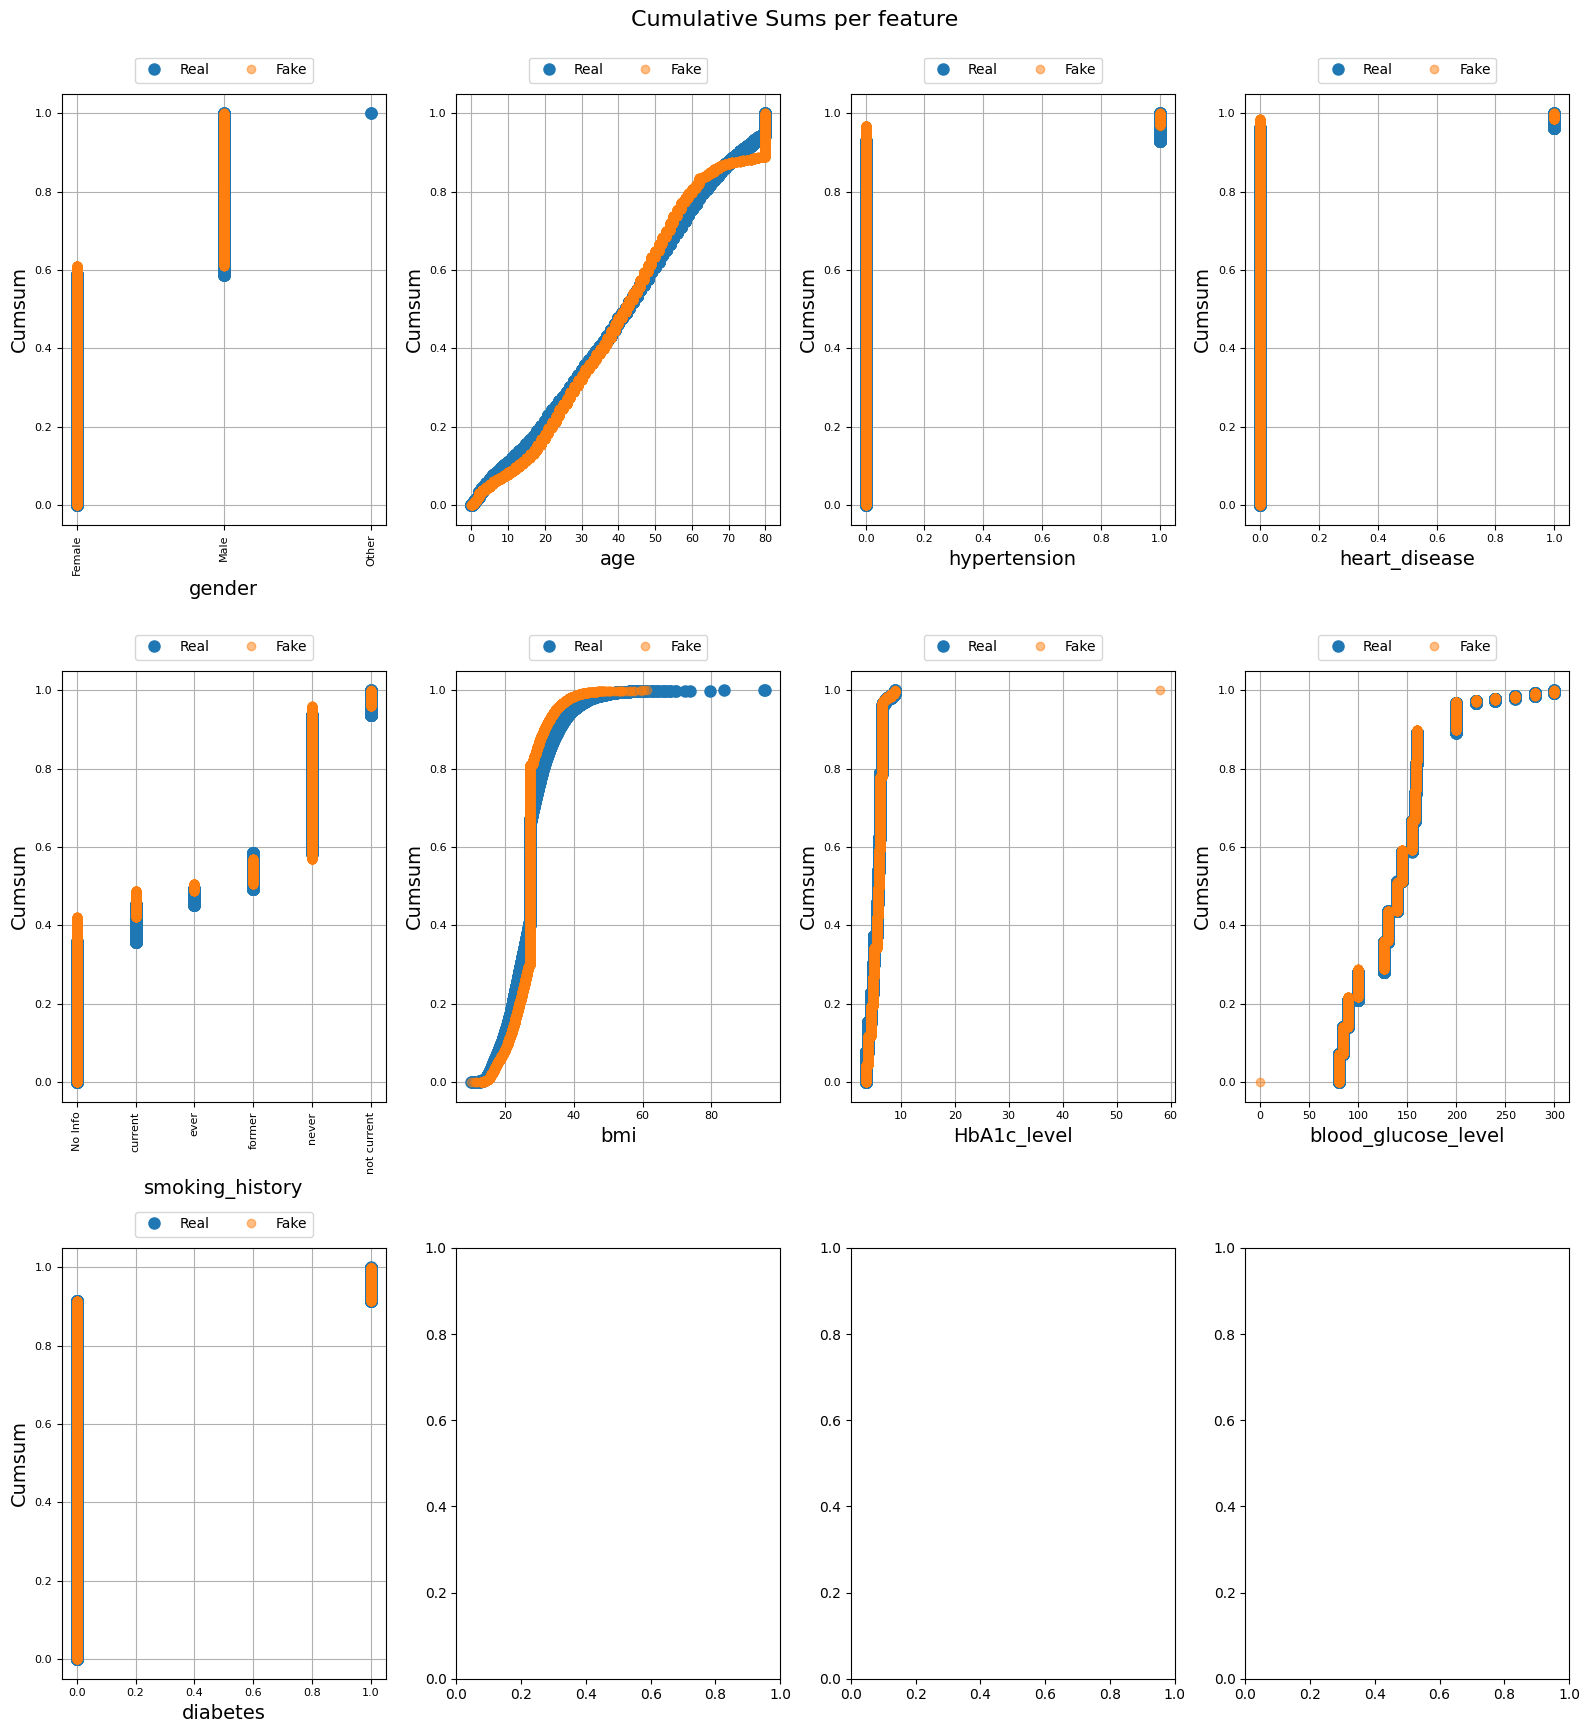

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


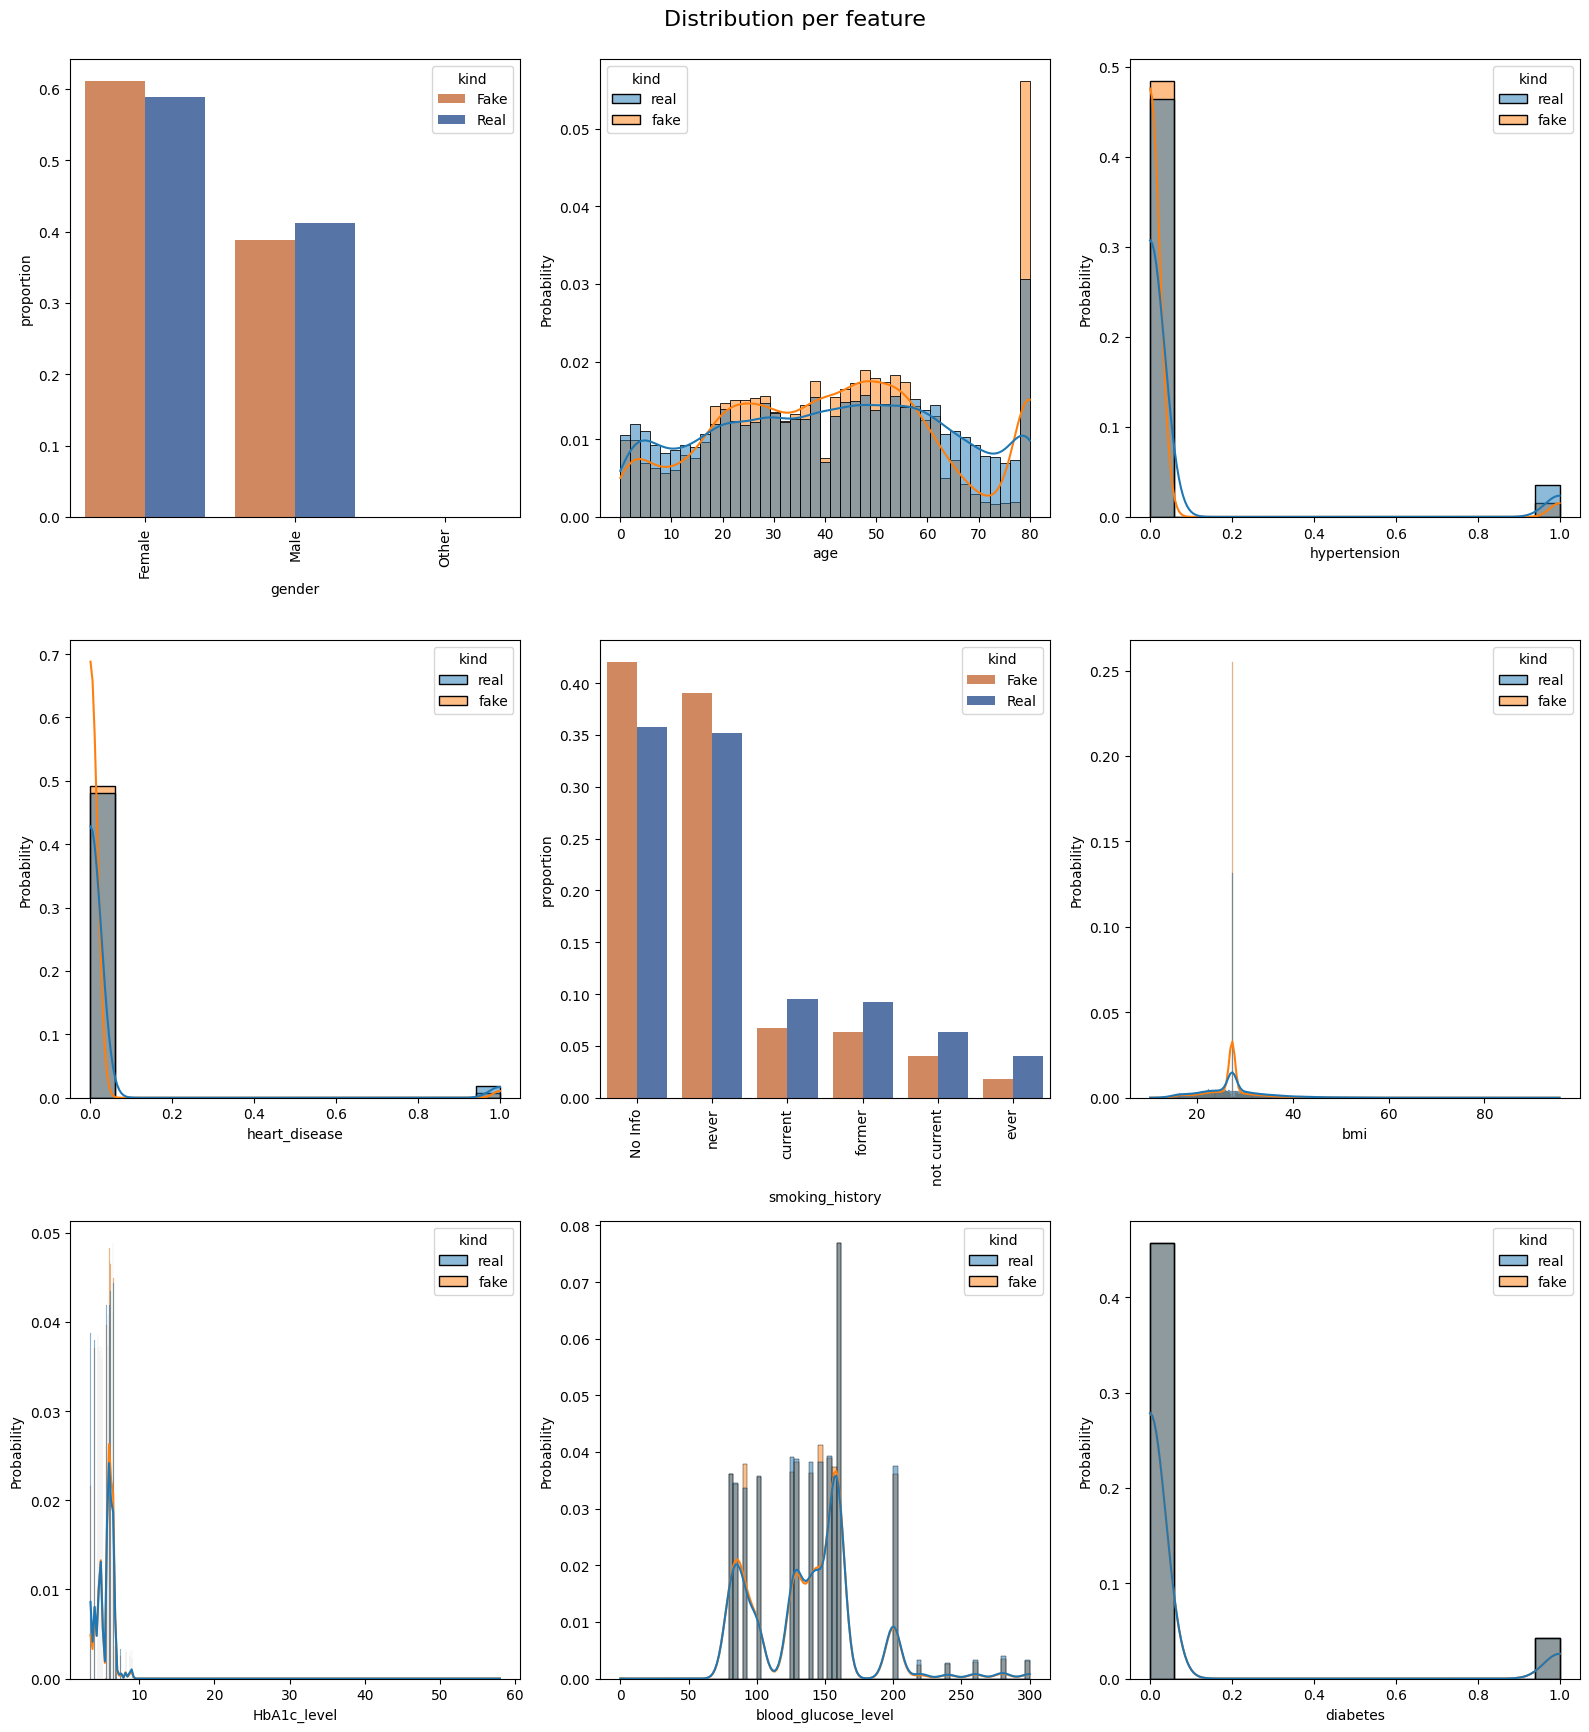

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/li

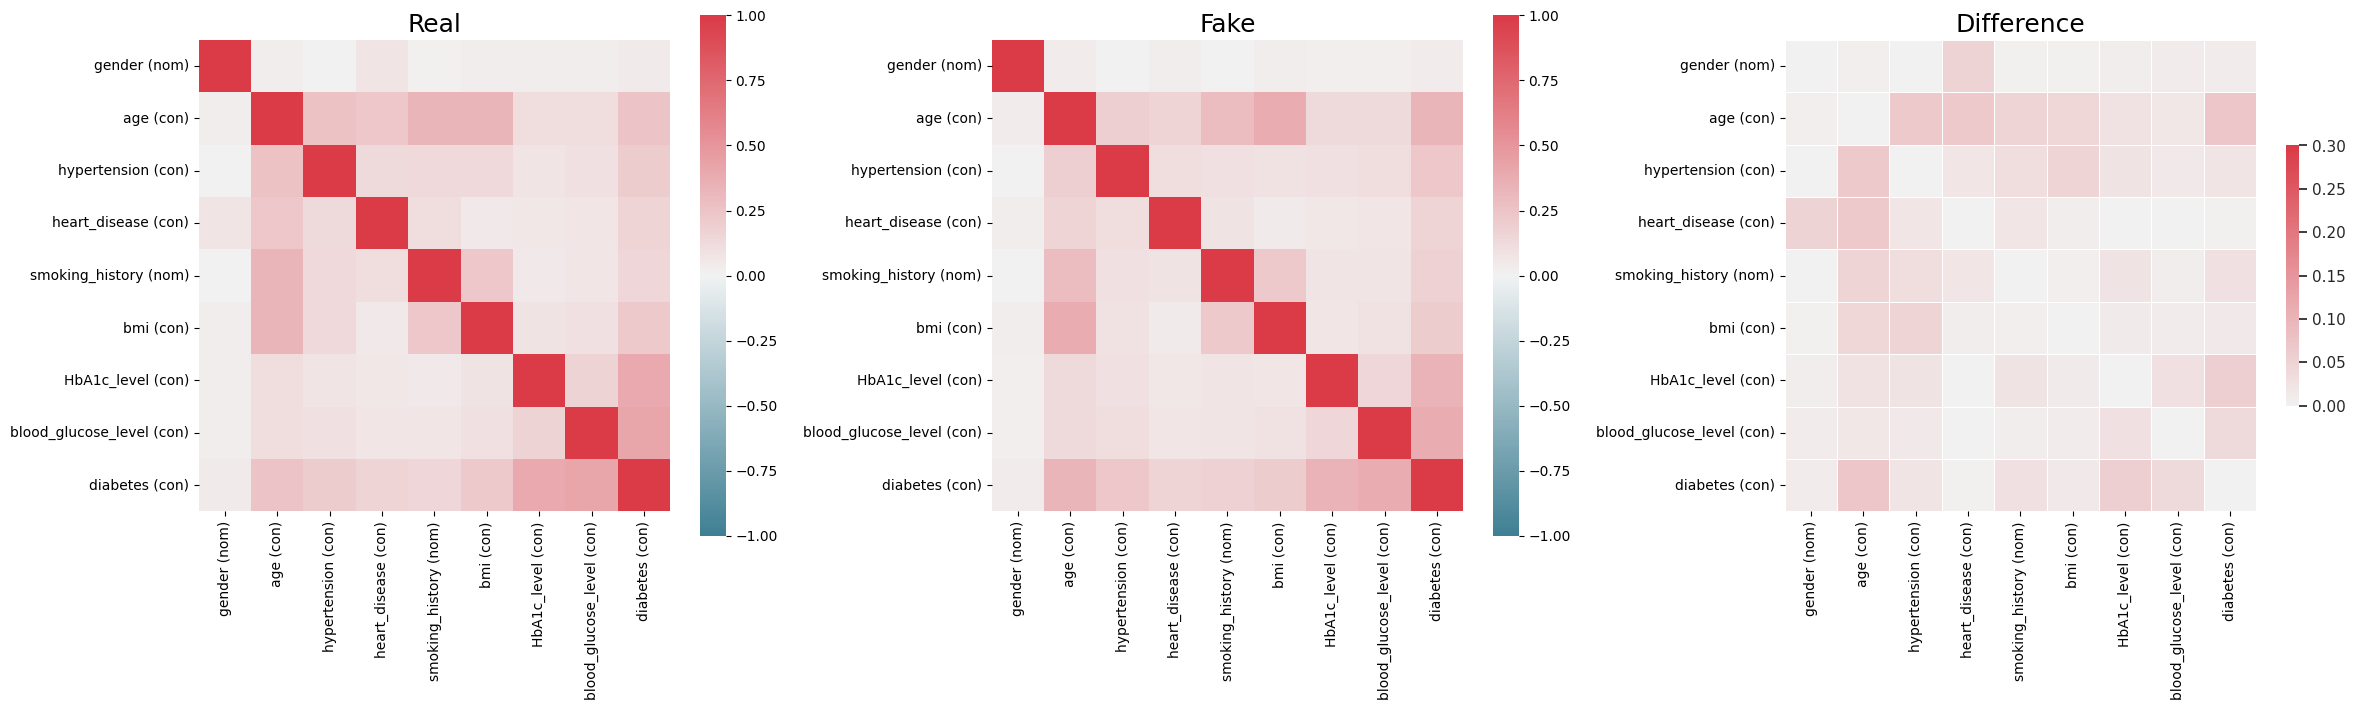

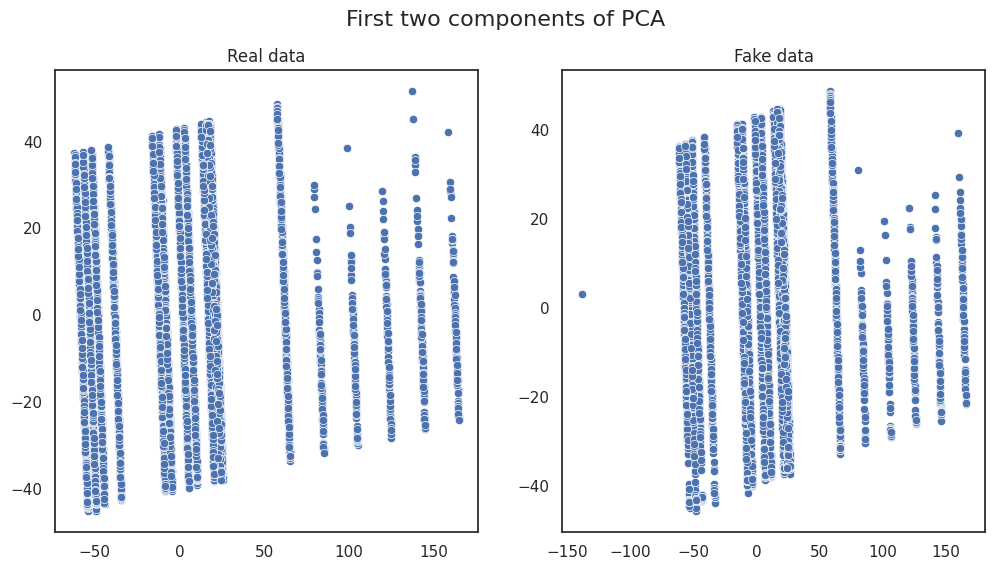

In [14]:
from table_evaluator import TableEvaluator
print(X_test.shape,synthetic_data.shape)
table_evaluator = TableEvaluator(X_test,synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='smoking_history')

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast 


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2802   0.4442              0.1734
DecisionTreeClassifier_real   0.3690   0.2680              0.1427
LogisticRegression_fake       0.2973   0.4793              0.3113
LogisticRegression_real       0.4375   0.2865              0.2983
MLPClassifier_fake            0.2802   0.5327              0.1996
MLPClassifier_real            0.4607   0.2470              0.2092
RandomForestClassifier_fake   0.3085   0.5128              0.1864
RandomForestClassifier_real   0.4180   0.2792              0.1655

Privacy results:
                                              result
Duplicate rows between sets (real/fake)  (378, 2243)
nearest neighbor mean                            NaN
nearest neighbor std                             NaN

Miscellaneous results:
                               

## Using Synthetic Data Vault for Data Evaluation

In [15]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


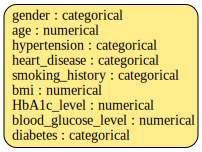

In [16]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [17]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

diagnostic = run_diagnostic(
    real_data=X_test,
    synthetic_data=synthetic_data,
    metadata=metadata
)

quality_report = evaluate_quality(
    data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 69.92it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 178.79it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 11.42it/s]|
Column Shapes Score: 94.85%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:06<00:00,  5.63it/s]|
Column Pair Trends Score: 99.02%

Overall Score (Average): 96.94%



In [18]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.974538
1,age,KSComplement,0.942625
2,hypertension,TVComplement,0.956025
3,heart_disease,TVComplement,0.974150
4,smoking_history,TVComplement,0.898063
5,bmi,KSComplement,0.852750
6,HbA1c_level,KSComplement,0.946750
7,blood_glucose_level,KSComplement,0.992125
8,diabetes,TVComplement,0.999337


### Calculate Range Coverage and KSComplement for Numerical Variables

In [19]:
from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['bmi','HbA1c_level']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for bmi is: 0.8258479532163743
KSComplement for bmi is: 0.8571625
Range coverage for HbA1c_level is: 1.0
KSComplement for HbA1c_level is: 0.9547000000000001


### Calculate Category Coverage and TVComplement for Categorical Variables

In [20]:

from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['smoking_history','diabetes']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=synthetic_data[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for smoking_history is: 1.0
TVComplement for smoking_history is: 0.897862500029105
Category coverage for diabetes is: 1.0
TVComplement for diabetes is: 0.9998375


#### Finding Wassetstein Distance and KL Divergence (Testing/Training vs Testing/Synthetic)

In [21]:
from scipy.stats import wasserstein_distance
wasserstein_distances = {}
for column in X_test.columns[5:]:
    wasserstein_dist = wasserstein_distance(X_test[column], synthetic_data[column])
    wasserstein_distances[column] = wasserstein_dist

In [22]:
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Synthetic Data {column}: {distance}')

Comparing Testing data and Synthetic Data bmi: 1.8107159999999987
Comparing Testing data and Synthetic Data HbA1c_level: 0.10601499999999854
Comparing Testing data and Synthetic Data blood_glucose_level: 0.7899250000000014
Comparing Testing data and Synthetic Data diabetes: 0.00016249999999995435


In [23]:
wasserstein_distances = {}
for column in X_test.columns[5:]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Training Data {column}: {distance}')

Comparing Testing data and Training Data bmi: 0.0843502499999998
Comparing Testing data and Training Data HbA1c_level: 0.01321375000000007
Comparing Testing data and Training Data blood_glucose_level: 0.2424875000000038
Comparing Testing data and Training Data diabetes: 0.000500000000000056


In [24]:
# Calculate KL Divergence for Testing vs Synthetic
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[5:]:
    kl_divergence = entropy(X_test[column], synthetic_data[:20000][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f' For Testing vs Synthetic Data {column}: {divergence}')

 For Testing vs Synthetic Data bmi: inf
 For Testing vs Synthetic Data HbA1c_level: 0.036486482798440883
 For Testing vs Synthetic Data blood_glucose_level: inf
 For Testing vs Synthetic Data diabetes: inf


In [25]:
# Calculate KL Divergence for Testing vs Training
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[5:]:
    kl_divergence = entropy(X_test[column], data[:20000][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Testing vs Training Data {column}: {divergence}')

For Testing vs Training Data bmi: 0.05766041660713487
For Testing vs Training Data HbA1c_level: 0.03949526584534168
For Testing vs Training Data blood_glucose_level: 0.08392210174192599
For Testing vs Training Data diabetes: inf


In [26]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient for each feature
pearson_correlations = {}
for column in X_test.columns[5:]:
    correlation, _ = pearsonr(X_test[column], synthetic_data[:20000][column])
    pearson_correlations[column] = correlation

# Print Pearson correlation coefficients for each feature
for column, correlation in pearson_correlations.items():
    print(f' Comparing testing and synthetic data {column}: {correlation}')

 Comparing testing and synthetic data bmi: -0.015015921901764763
 Comparing testing and synthetic data HbA1c_level: -0.01168566512544644
 Comparing testing and synthetic data blood_glucose_level: 0.0047333653104089865
 Comparing testing and synthetic data diabetes: -0.00245155009973226


In [27]:
# Find common duplicate rows between df1 and df2
common_duplicates = pd.merge(X_test, synthetic_data, how='inner')
new = common_duplicates.drop_duplicates()
# Print the common duplicate rows
print("Common Duplicate Rows:")
print(common_duplicates)
print(new)

Common Duplicate Rows:
      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  51.0             0              0         current  27.32   
1       Male  60.0             0              0          former  27.32   
2     Female  27.0             0              0         No Info  27.32   
3     Female  27.0             0              0         No Info  27.32   
4     Female  27.0             0              0         No Info  27.32   
...      ...   ...           ...            ...             ...    ...   
4489    Male  30.0             0              0           never  27.32   
4490    Male   5.0             0              0         No Info  27.32   
4491    Male  20.0             0              0         current  27.32   
4492  Female  20.0             0              0         No Info  27.32   
4493  Female  20.0             0              0         No Info  27.32   

      HbA1c_level  blood_glucose_level  diabetes  
0             5.0                  15

In [28]:
# Check for MSE and r2
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test['bmi'], data[:20000]['bmi'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test['bmi'], synthetic_data[:20000]['bmi'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test['bmi'], data[:20000]['bmi'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test['bmi'], synthetic_data[:20000]['bmi'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 89.76393477
MSE between Testing Data and Synthetic Data: 68.33716958
R-squared Score (between Testing Data and Real Data): -0.9868047213716356
R-squared Score (between Testing Data and Synthetic Data): -0.5125519120190645
